## Loan Prediction Project

### It involves the decision to automate loan eligbility process(real time) based on the detail the customer provided while filling the online application form.

### Details provided include Gender, marital status,education, number ofo dependents, income, loan amount, credit history and others.

## STEP 1: Understanding the problem Statement 

### The problem here is a classification problem. It requires us to decide whether a customer is eligible or not for a loan. Since there are only options-eligible or not eligible- It is thus a a binary classification problem.

## STEP 2: Hypothesis Generation

### Here, before looking into the data at all, I made some assumptions on the possible factors thatt influence the outcome(i.e the loan eligibility)

### 1. People with higher level of education are more likely to get the loan 
### 2. People with lesser number of dependants are more likely to get the loan
### 3. People with higher income are more likely to get the loan
### 4. People requesting for lower loan amount are more likely to get the loan
### 5. People with positive credit history have higher chances of getting the loan
### 6. Male folks are more lkely to get the loan


## STEP 3: Exploratory data analysis

### Having made a quite number of assumptions, it is time to check if the hypothesis made are true or not using the data given. To do this, we have to load the data and do the univariate and bivariate analysis.

### let's get started already

### IMPORT ALL RELEVANT LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### LOAD THE DATA

In [2]:
train_original = pd.read_csv("C:/Users/Sumaya/Downloads/train_ctrUa4K.csv")
test_original = pd.read_csv("C:/Users/Sumaya/Downloads/test_lAUu6dG.csv")

### COPY THE DATA AND SAVE AS ANOTHER VARIABLE TO PRESERVE THE ORIGINALITY OF THE DATA

In [3]:
train = train_original.copy()
test = test_original.copy()

### HAVE AN OVERVIEW OF WHAT THE DATA IS LIKE - FEATURES,DATA TYPE, SHAPE, etc

In [4]:
train.head()
train.info()


#there are 13 columns and 614 rows
#8 objects type, 4 float64 type and one int64 type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### COMMENCE THE UNIVARIATE ANALYSIS

### Use bar plots for CATEGORICAL variables(Gender,	Married, Self_Employed,	Loan_Status and Credit_History)  and ORDINAL variables (Dependents, Education and Property_Area) and use distplot or histogram for NUMERICAL variable(ApplicantIncome, CoapplicantIncome, LoanAmount and Loan_Amount_Term)


### NUMERICAL VARIABLES

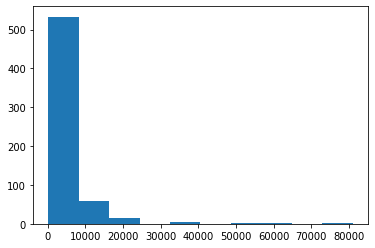

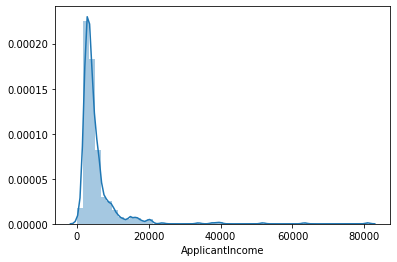

In [8]:
plt.hist(train['ApplicantIncome'])
plt.show()

sns.distplot(train['ApplicantIncome'])
#sns.boxplot(train['ApplicantIncome'])
#train['ApplicantIncome'].plot.box()

#### The result here shows that the ApplicantIncome for the different loan applicants are right skewed. There are few outliers in the variable. the level of education of the applicants might be a reason. To investigate this, we can plot the boxplot of the distribution by Education

Text(0.5, 0.98, '')

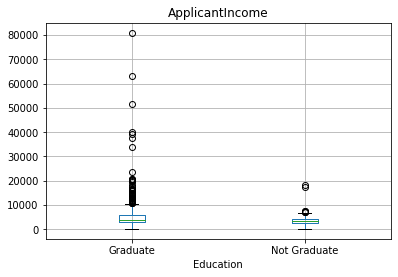

In [9]:
train.boxplot(column ='ApplicantIncome',by = 'Education')
plt.suptitle('')

### there are a number of highly educated applicants whose income is very high and thus forming the outliers.

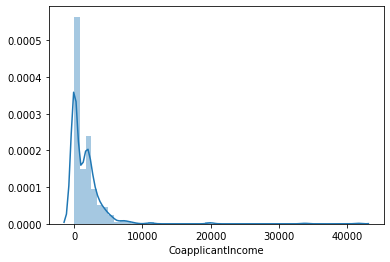

In [10]:
sns.distplot(train['CoapplicantIncome'])

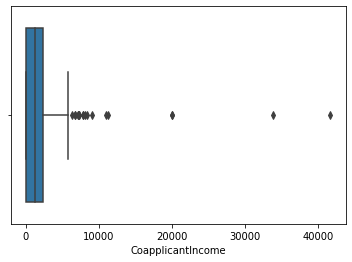

In [11]:
sns.boxplot(train['CoapplicantIncome'])

### The distribution has the same pattern as that of the ApplicantIcome distribution

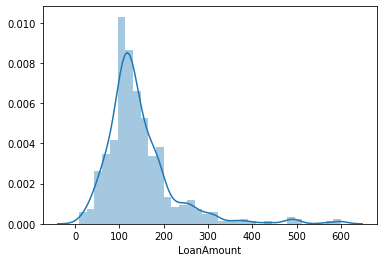

In [12]:
na_free = train.dropna()
sns.distplot(na_free['LoanAmount'])

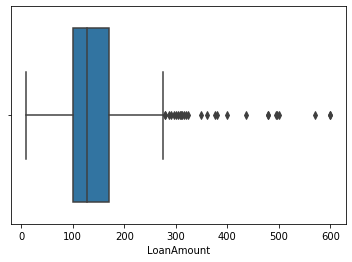

In [13]:
sns.boxplot(na_free['LoanAmount'])

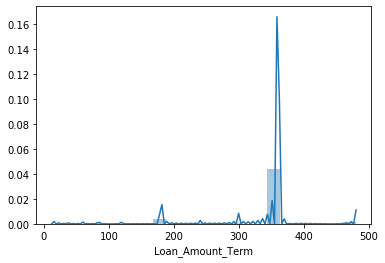

In [14]:
sns.distplot(train['Loan_Amount_Term'])

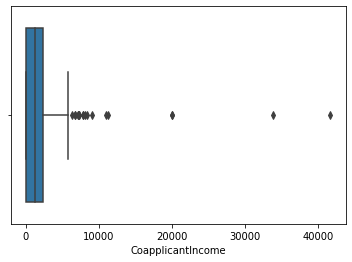

In [15]:
sns.boxplot(train['CoapplicantIncome'])

### CATEGORICAL VARIABLE

#### Let's start with the target variable itself - Loan Status

Text(0.5, 1.0, 'Loan Status')

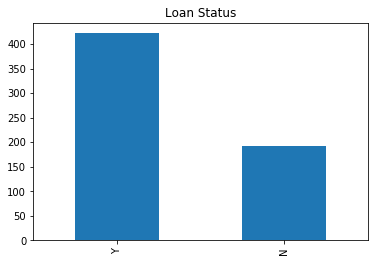

In [16]:
train['Loan_Status'].value_counts().plot.bar()
plt.title('Loan Status')

#### It's obvious that the majority of loan applicants got a positive response. We might be interested in knowing the exact number of and percentage

In [17]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [18]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

#### This confirms that the percentage of loan applicants with a positive response is almost twice of those with negative

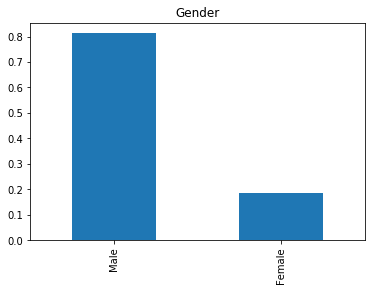

In [19]:
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

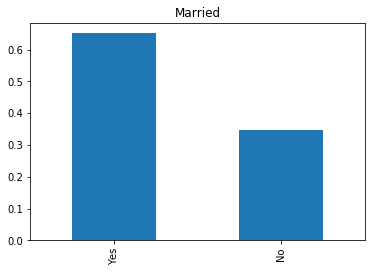

In [20]:
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

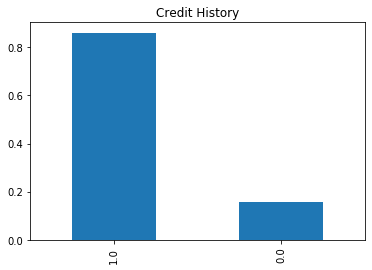

In [21]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

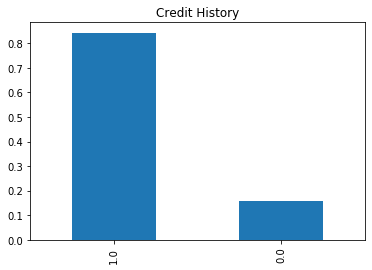

In [22]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

### ORDINAL VARIABLE

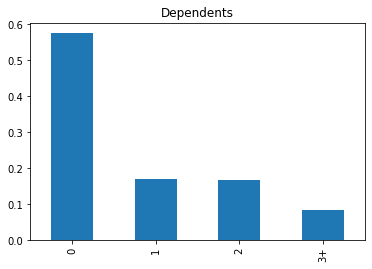

In [23]:
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')

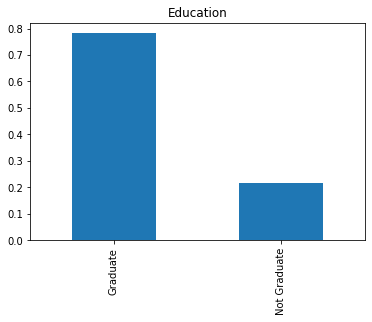

In [24]:
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

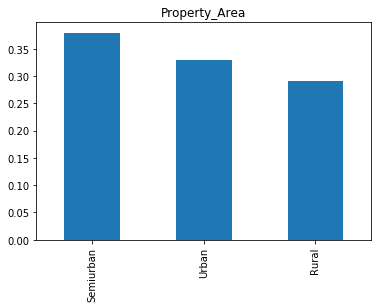

In [25]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

### BIVARIATE ANALYSIS

### The intent here is to put the earlier hypothesis to test and see which f them is correct about the  data given. We do this by using stacked charts for categorical and ordinal variable and also for the numerical variable after creating bins for..

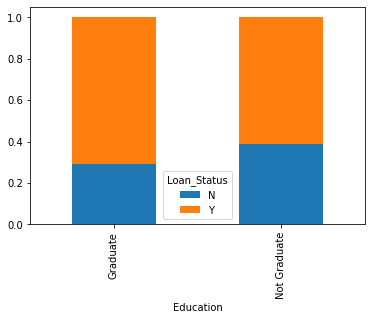

In [26]:
education = pd.crosstab(train['Education'],train['Loan_Status'])
education.div(education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
#education.plot(kind='bar',stacked=True)

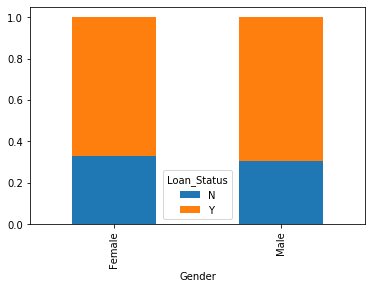

In [27]:
gender = pd.crosstab(train['Gender'],train['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

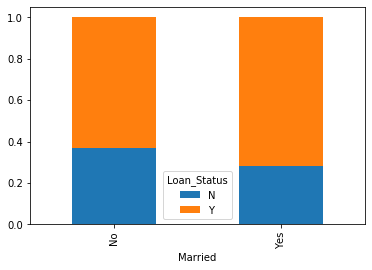

In [28]:
married = pd.crosstab(train['Married'],train['Loan_Status'])
married.div(married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

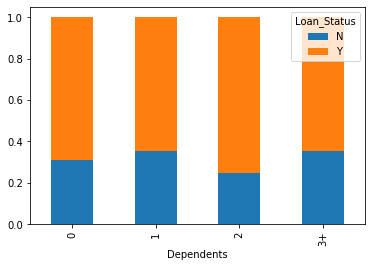

In [29]:
dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
dependents.div(dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

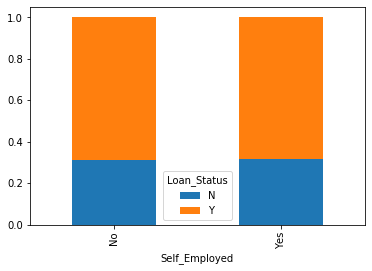

In [30]:
self_employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
self_employed.div(self_employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

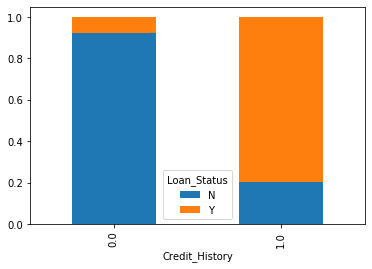

In [31]:
credit_history = pd.crosstab(train['Credit_History'],train['Loan_Status'])
credit_history.div(credit_history.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

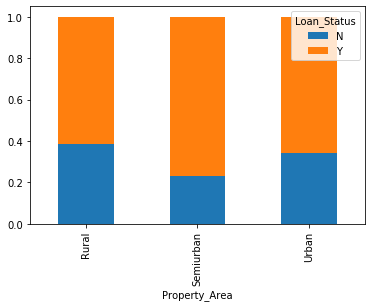

In [32]:
property_area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
property_area.div(property_area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [33]:
df_num = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
no_null_num = df_num.dropna()
df_cat = train[['Gender', 'Married', 'Self_Employed', 'Loan_Status','Credit_History','Dependents', 'Education', 'Property_Area']]


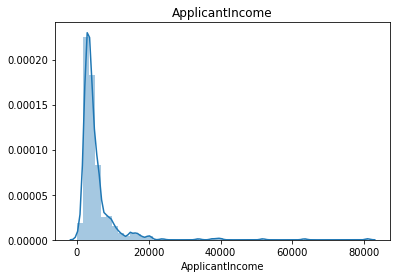

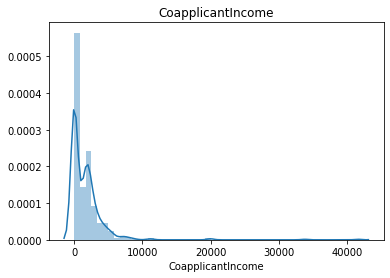

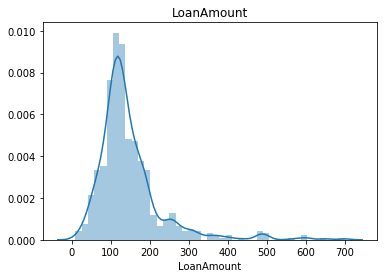

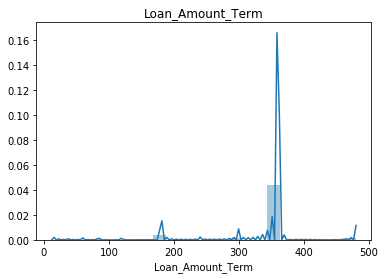

In [34]:
for i in df_num:
    sns.distplot(no_null_num[i])
    plt.title(i)
    plt.show()

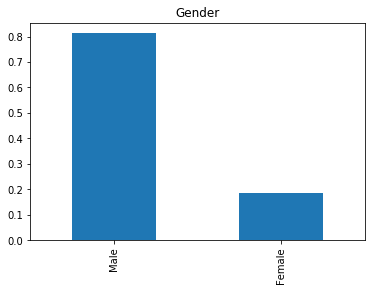

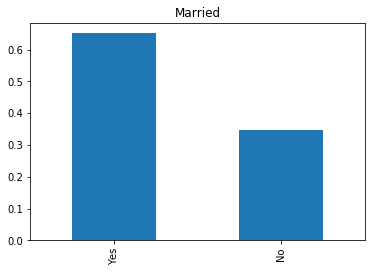

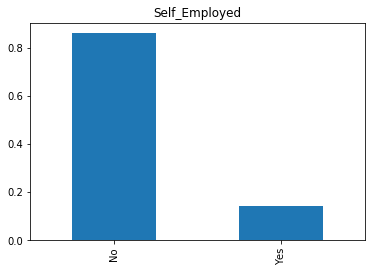

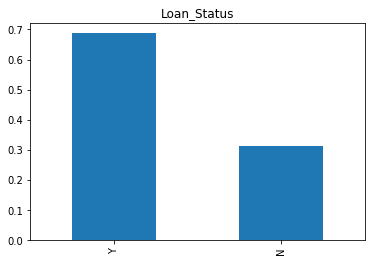

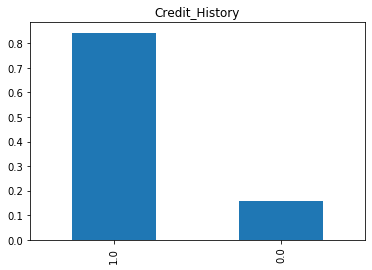

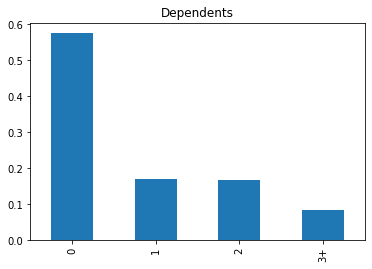

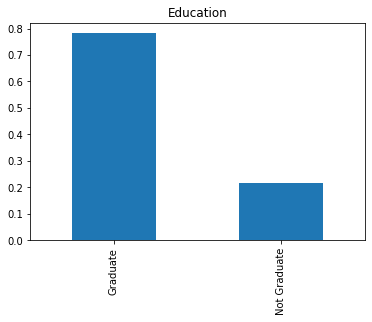

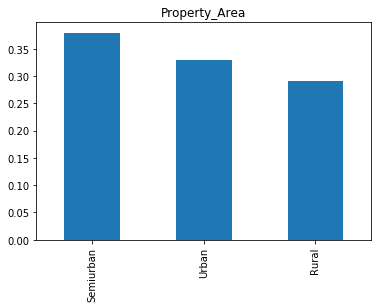

In [35]:
for j in df_cat:
    df_cat[j].value_counts(normalize=True).plot.bar(title=j)
    plt.title(j)
    plt.show()

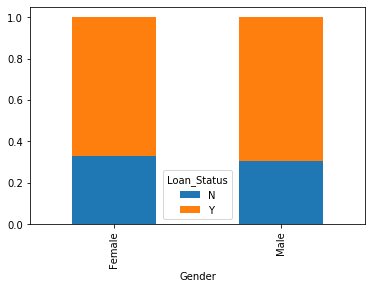

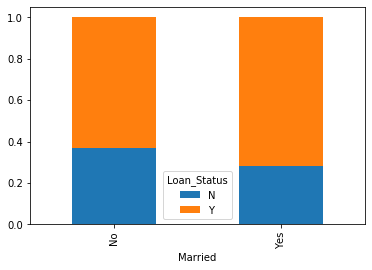

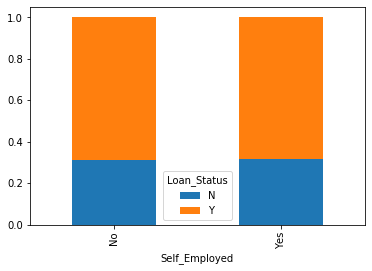

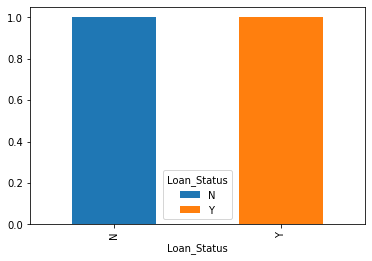

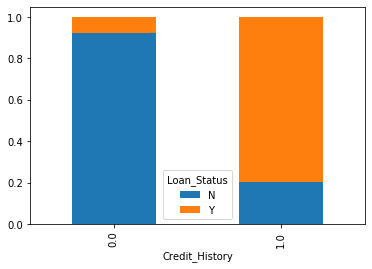

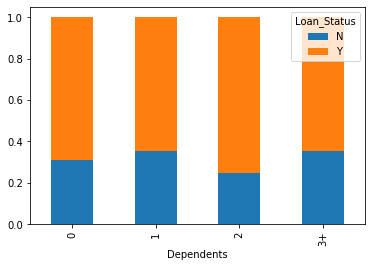

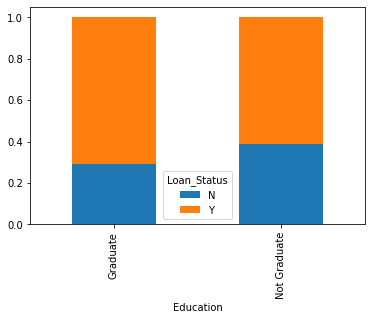

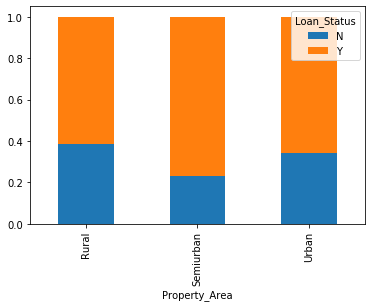

In [36]:
for k in df_cat:
    name = pd.crosstab(df_cat[k],train['Loan_Status'])
    name.div(name.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
    #pd.crosstab(df_cat[k],train['Loan_Status']).div().plot(kind="bar",stacked=True)
    

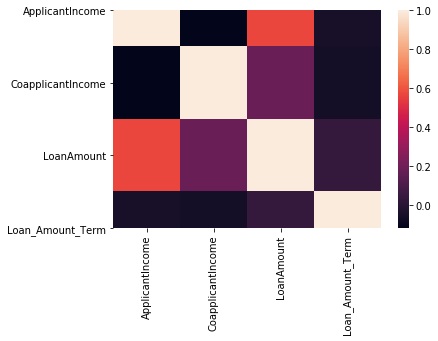

In [37]:
df_num.corr()
sns.heatmap(df_num.corr())

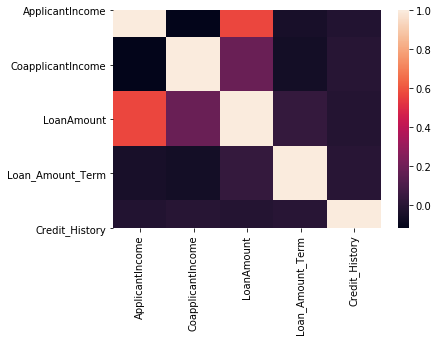

In [38]:
train.corr()
sns.heatmap(train.corr())

In [39]:
pd.pivot_table(train,index='Loan_Status', columns='Gender',values='Loan_ID',aggfunc='count')

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


### MISSING VALUE AND OUTLIER TREATMENT

### MISSING VALUES

In [40]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
train['Gender'].mode()

0    Male
dtype: object

In [42]:
train['LoanAmount'].min()

9.0

In [43]:
train['Self_Employed'].mode()

0    No
dtype: object

In [44]:
train['Loan_Amount_Term'].mean()

342.0

In [45]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [46]:
df_train_null = train[['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term', 'Credit_History']]
df_test_null = test[['Gender','Dependents','LoanAmount','Loan_Amount_Term','Credit_History']]

In [47]:
for i in df_train_null:
    df_train_null[i].fillna(df_train_null[i].mode()[0], inplace=True)

In [48]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [49]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

In [50]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [51]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [52]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

In [53]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [54]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [55]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [56]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [57]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [58]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [59]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [60]:
train['ApplicantIncome_log'] = np.log(train['ApplicantIncome'])
test['ApplicantIncome_log'] = np.log(train['ApplicantIncome'])


In [61]:
#train['CoapplicantIncome_log'] = np.log(train['CoapplicantIncome'])
#test['CoapplicantIncome_log'] = np.log(train['CoapplicantIncome'])


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
Loan_ID                614 non-null object
Gender                 614 non-null object
Married                614 non-null object
Dependents             614 non-null object
Education              614 non-null object
Self_Employed          614 non-null object
ApplicantIncome        614 non-null int64
CoapplicantIncome      614 non-null float64
LoanAmount             614 non-null float64
Loan_Amount_Term       614 non-null float64
Credit_History         614 non-null float64
Property_Area          614 non-null object
Loan_Status            614 non-null object
LoanAmount_log         614 non-null float64
ApplicantIncome_log    614 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 72.1+ KB


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Loan_ID                367 non-null object
Gender                 367 non-null object
Married                367 non-null object
Dependents             367 non-null object
Education              367 non-null object
Self_Employed          367 non-null object
ApplicantIncome        367 non-null int64
CoapplicantIncome      367 non-null int64
LoanAmount             367 non-null float64
Loan_Amount_Term       367 non-null float64
Credit_History         367 non-null float64
Property_Area          367 non-null object
LoanAmount_log         367 non-null float64
ApplicantIncome_log    367 non-null float64
dtypes: float64(5), int64(2), object(7)
memory usage: 40.3+ KB


In [64]:
train_new = train.drop(['Loan_ID','ApplicantIncome','LoanAmount','CoapplicantIncome'],axis=1)

In [65]:
test_new = test.drop(['Loan_ID','ApplicantIncome','LoanAmount','CoapplicantIncome'],axis=1)

### Drop the Self_Employment variable since its not telling anything significant from the bivariate analysis we did earlier

In [66]:
train_new = train_new.drop('Self_Employed',axis=1)

In [67]:
test_new = test_new.drop('Self_Employed',axis=1)

In [68]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
Gender                 367 non-null object
Married                367 non-null object
Dependents             367 non-null object
Education              367 non-null object
Loan_Amount_Term       367 non-null float64
Credit_History         367 non-null float64
Property_Area          367 non-null object
LoanAmount_log         367 non-null float64
ApplicantIncome_log    367 non-null float64
dtypes: float64(4), object(5)
memory usage: 25.9+ KB


### Split data into target and independent variable

In [69]:
y = train_new['Loan_Status']
x = train_new.drop('Loan_Status',axis=1)

In [70]:
x

,Gender,Married,Dependents,Education,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log
0,Male,No,0,Graduate,360.0,1.0,Urban,4.852030,8.674026
1,Male,Yes,1,Graduate,360.0,1.0,Rural,4.852030,8.430109
2,Male,Yes,0,Graduate,360.0,1.0,Urban,4.189655,8.006368
3,Male,Yes,0,Not Graduate,360.0,1.0,Urban,4.787492,7.856707
4,Male,No,0,Graduate,360.0,1.0,Urban,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,360.0,1.0,Rural,4.262680,7.972466
610,Male,Yes,3+,Graduate,180.0,1.0,Rural,3.688879,8.320205
611,Male,Yes,1,Graduate,360.0,1.0,Urban,5.533389,8.996157
612,Male,Yes,2,Graduate,360.0,1.0,Urban,5.231109,8.933664


In [71]:
train['CoapplicantIncome'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

### Create dummy parameters for the categorical variables

### For Independent Variable

In [72]:
X = pd.get_dummies(x)
test_ = pd.get_dummies(test_new)
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#ct = ColumnTransformer(transformers=[('one_hot_encoder',OneHotEncoder(categories='auto'),[0])],remainder='passthrough')
#X = ct.fit_transform(x)
#test_ = ct.fit_transform(test_new)
        

### For dependent Variable

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(y)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
test_ = scaler.fit_transform(test_)

### Split the train data into train and test

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [76]:
X_train

array([[ 0.2732313 ,  0.41173269,  1.76122735, ...,  1.55889948,
        -0.7820157 , -0.70020801],
       [-2.52283563,  0.41173269,  0.19890743, ...,  1.55889948,
        -0.7820157 , -0.70020801],
       [ 0.2732313 ,  0.41173269, -0.22663429, ..., -0.64147818,
         1.2787467 , -0.70020801],
       ...,
       [ 0.2732313 ,  0.41173269,  0.88998102, ..., -0.64147818,
         1.2787467 , -0.70020801],
       [ 0.2732313 ,  0.41173269,  0.43972415, ..., -0.64147818,
        -0.7820157 ,  1.42814704],
       [ 0.2732313 ,  0.41173269,  0.69968185, ..., -0.64147818,
         1.2787467 , -0.70020801]])

In [77]:
test_

array([[ 0.26602207,  0.4376739 , -0.30445573, ..., -0.65847836,
        -0.67981718,  1.27335328],
       [ 0.26602207,  0.4376739 ,  0.02228726, ..., -0.65847836,
        -0.67981718,  1.27335328],
       [ 0.26602207,  0.4376739 ,  1.22832616, ..., -0.65847836,
        -0.67981718,  1.27335328],
       ...,
       [ 0.26602207,  0.4376739 ,  0.02228726, ..., -0.65847836,
         1.47098372, -0.78532801],
       [ 0.26602207,  0.4376739 ,  0.56680411, ...,  1.51865279,
        -0.67981718, -0.78532801],
       [-2.52163936,  0.4376739 , -0.58238355, ...,  1.51865279,
        -0.67981718, -0.78532801]])

### Create your model

### Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression(random_state=0, solver='lbfgs')
lmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the result

In [79]:
Y_pred = lmodel.predict(X_test)

### Checking prediction accuracy with confusion marix

In [94]:
from sklearn.metrics import confusion_matrix
Y_pred = lmodel.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)

print(cm)
result = lmodel.predict(test_)
print(lmodel.score(X_train,Y_train))
submission = pd.DataFrame(test['Loan_ID'])
submission['Loan_Status'] = result
submission['Loan_Status'] = submission['Loan_Status'].map({0:'N',1:'Y'})
submission.to_csv('submission.csv',index=False)

[[ 21  30]
 [  2 132]]
0.8018648018648019


In [91]:
print(cm)

[[ 61  80]
 [  5 283]]


In [90]:
result = lmodel.predict(test_)

In [83]:
submission = pd.DataFrame(test['Loan_ID'])

In [84]:
submission['Loan_Status'] = result

In [85]:
submission['Loan_Status'] = submission['Loan_Status'].map({0:'N',1:'Y'})

In [86]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [87]:
submission.to_csv('submission.csv',index=False)

In [88]:
submission


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


### Linear Regression

In [89]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,Y_train)

Y_hat = reg.predict(X_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train,Y_hat)
print(cm)

print(reg.score(X_train,Y_train))

result_1 = reg.predict(test_)
submission_LR = pd.DataFrame(test['Loan_ID'])
submission_LR['Loan_Status'] = result_1
submission_LR['Loan_Status'] = submission_LR['Loan_Status'].map({0:'N',1:'Y'})
submission_LR.to_csv('submission_LR.csv',index=False)

[[ 61  80]
 [  5 283]]
0.8018648018648019


### Support Vector

In [100]:
from sklearn.svm import SVC
classifier = SVC(gamma='scale')
classifier.fit(X_train,Y_train)


Y_hat = classifier.predict(X_train)
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train,Y_hat)
print(cm)
cm1 = confusion_matrix(Y_test,Y_pred)
print(cm1)

print(classifier.score(X_train,Y_train))

result_2 = classifier.predict(test_)
submission_SVM= pd.DataFrame(test['Loan_ID'])
submission_SVM['Loan_Status'] = result_2
submission_SVM['Loan_Status'] = submission_SVM['Loan_Status'].map({0:'N',1:'Y'})
submission_SVM.to_csv('submission_SVM.csv',index=False)

[[ 64  77]
 [  4 284]]
[[ 21  30]
 [  2 132]]
0.8111888111888111


### K-Nearest Neighbour

In [104]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
KNN.fit(X_train,Y_train)


Y_hat = KNN.predict(X_train)
Y_pred = KNN.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train,Y_hat)
print(cm)
cm1 = confusion_matrix(Y_test,Y_pred)
print(cm1)

print(KNN.score(X_train,Y_train))

result_3 = KNN.predict(test_)
submission_KNN = pd.DataFrame(test['Loan_ID'])
submission_KNN['Loan_Status'] = result_3
submission_KNN['Loan_Status'] = submission_KNN['Loan_Status'].map({0:'N',1:'Y'})
submission_KNN.to_csv('submission_KNN.csv',index=False)

[[ 65  76]
 [ 12 276]]
[[ 14  37]
 [  8 126]]
0.7948717948717948


### Gaussian Baye's

In [105]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train,Y_train)

Y_hat = bayes.predict(X_train)
Y_pred = bayes.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train,Y_hat)
print(cm)
cm1 = confusion_matrix(Y_test,Y_pred)
print(cm1)

print(bayes.score(X_train,Y_train))

result_4 = bayes.predict(test_)
submission_GB = pd.DataFrame(test['Loan_ID'])
submission_GB['Loan_Status'] = result_4
submission_GB['Loan_Status'] = submission_GB['Loan_Status'].map({0:'N',1:'Y'})
submission_GB.to_csv('submission_GB.csv',index=False)

[[ 68  73]
 [ 14 274]]
[[ 23  28]
 [  8 126]]
0.7972027972027972


### KNeighbours Classifier

In [106]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)


Y_hat = classifier.predict(X_train)
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train,Y_hat)
print(cm)
cm1 = confusion_matrix(Y_test,Y_pred)
print(cm1)

print(classifier.score(X_train,Y_train))

result_5 = classifier.predict(test_)
submission_KNC = pd.DataFrame(test['Loan_ID'])
submission_KNC['Loan_Status'] = result_5
submission_KNC['Loan_Status'] = submission_KNC['Loan_Status'].map({0:'N',1:'Y'})
submission_KNC.to_csv('submission_KNC.csv',index=False)

[[ 65  76]
 [ 12 276]]
[[ 14  37]
 [  8 126]]
0.7948717948717948


### Decision Tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion='entropy',random_state=0)
dectree.fit(X_train,Y_train)



Y_hat = dectree.predict(X_train)
Y_pred = dectree.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train,Y_hat)
print(cm)
cm1 = confusion_matrix(Y_test,Y_pred)
print(cm1)

print(dectree.score(X_train,Y_train))

result_6 = dectree.predict(test_)
submission_DTC = pd.DataFrame(test['Loan_ID'])
submission_DTC['Loan_Status'] = result_6
submission_DTC['Loan_Status'] = submission_DTC['Loan_Status'].map({0:'N',1:'Y'})
submission_DTC.to_csv('submission_DTC.csv',index=False)


[[141   0]
 [  0 288]]
[[ 31  20]
 [ 32 102]]
1.0
